In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, root_mean_squared_error, recall_score, precision_score, mean_absolute_error

In [17]:
df = pd.read_csv('./Social_Network_Ads.csv')

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [20]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [21]:
df.drop('User ID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [22]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [24]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

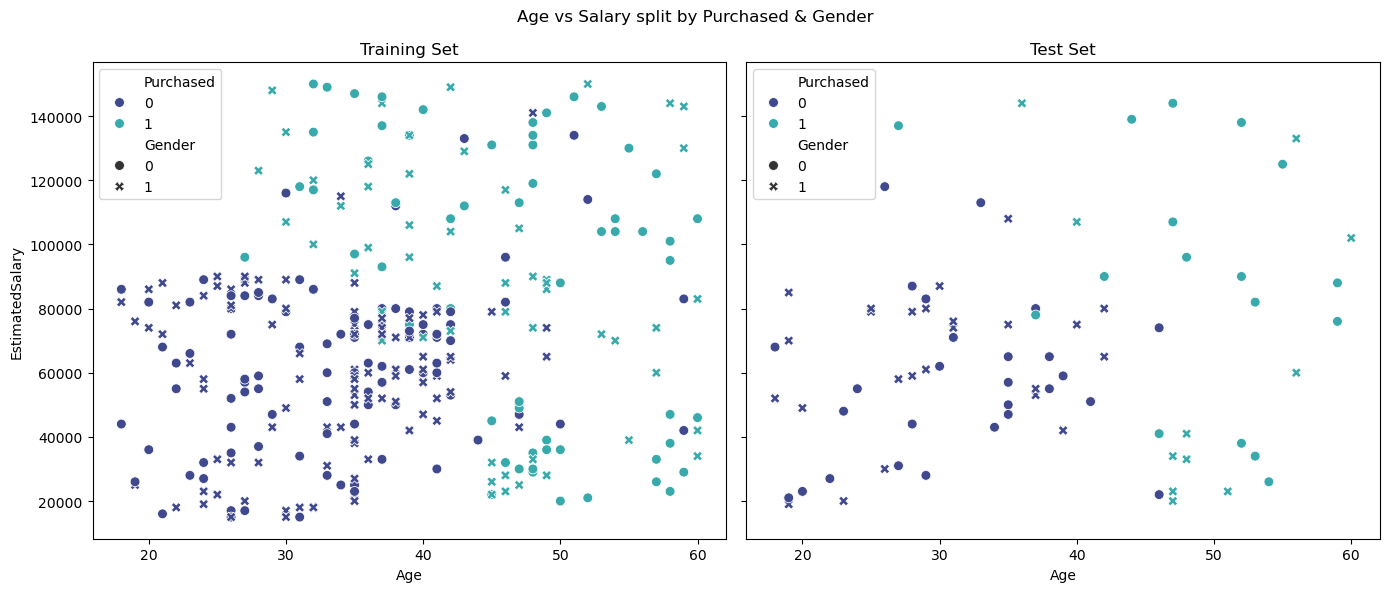

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training set
sns.scatterplot(
    x=X_train['Age'], 
    y=X_train['EstimatedSalary'],
    hue=y_train,
    style=X_train['Gender'],
    palette='mako', 
    s=50, ax=axes[0]
)
axes[0].set_title("Training Set")

# Test set
sns.scatterplot(
    x=X_test['Age'], 
    y=X_test['EstimatedSalary'],
    hue=y_test,
    style=X_test['Gender'],
    palette='mako', 
    s=50, ax=axes[1]
)
axes[1].set_title("Test Set")

plt.suptitle("Age vs Salary split by Purchased & Gender")
plt.tight_layout()
plt.show()

In [28]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_pred = model.predict(X_test_scaled)
print(f"Model Coefficients: {model.coef_}, Intercept: {model.intercept_}")

Model Coefficients: [[0.13721002 1.98963144 1.14512193]], Intercept: [-1.00504843]


In [30]:
#classification only
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nRecall:", recall_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred))

#can be used for both
print("\nR2 Score:", r2_score(y_test, y_pred))
print("\nRoot Mean Squared Error:", root_mean_squared_error(y_test, y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred))

Confusion Matrix:
 [[50  2]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80


Accuracy: 0.8875

Recall: 0.75

Precision: 0.9130434782608695

R2 Score: 0.5054945054945056

Root Mean Squared Error: 0.33541019662496846

Mean Absolute Error: 0.1125


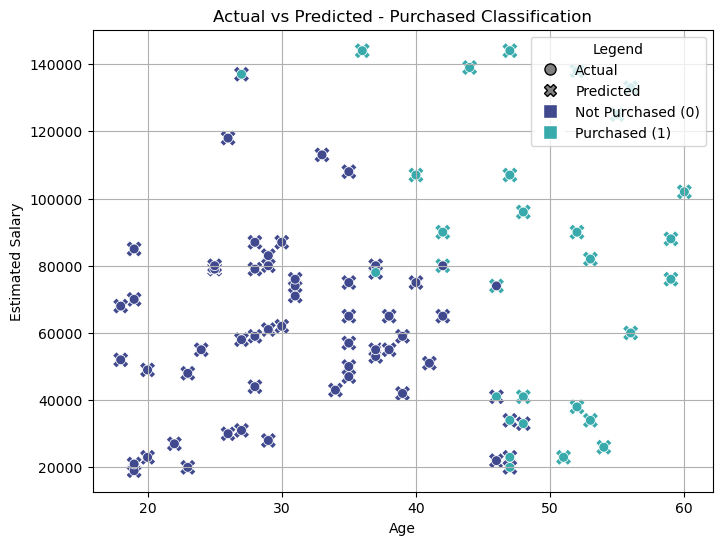

In [31]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot predicted (X markers)
sns.scatterplot(
    x=X_test['Age'],
    y=X_test['EstimatedSalary'],
    hue=y_pred,
    style=y_pred,
    palette='mako',
    markers={0: 'X', 1: 'X'},
    s=150,
    ax=ax,
    legend=False
)

# Plot actual (o markers)
sns.scatterplot(
    x=X_test['Age'],
    y=X_test['EstimatedSalary'],
    hue=y_test,
    style=y_test,
    palette='mako',
    markers={0: 'o', 1: 'o'},
    s=50,
    ax=ax,
    legend=False
)

custom_legend = [
    # Marker meaning
    Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='gray', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='X', color='w', label='Predicted', markerfacecolor='gray', markeredgecolor='black', markersize=8),
    
    # Class meaning
    Line2D([0], [0], marker='s', color='w', label='Not Purchased (0)', markerfacecolor='#40498e', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Purchased (1)', markerfacecolor='#38aaac', markersize=10)
]

plt.legend(handles=custom_legend, title='Legend', loc='upper right')
plt.title("Actual vs Predicted - Purchased Classification")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()


In [32]:
def plot_decision_boundaries_side_by_side(model, scaler):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    for i, gender_value in enumerate([0, 1]):
        # Create meshgrid
        age_range = np.linspace(X['Age'].min(), X['Age'].max(), 200)
        salary_range = np.linspace(X['EstimatedSalary'].min(), X['EstimatedSalary'].max(), 200)
        xx, yy = np.meshgrid(age_range, salary_range)
        grid = np.c_[np.full(xx.ravel().shape, gender_value), xx.ravel(), yy.ravel()]
        grid_scaled = scaler.transform(grid)
        Z = model.predict(grid_scaled).reshape(xx.shape)

        # Create DataFrame for test points
        plot_df = X_test.copy()
        plot_df['Actual'] = y_test.values
        plot_df['Predicted'] = y_pred
        plot_df = plot_df[plot_df['Gender'] == gender_value]

        ax = axes[i]
        ax.set_title(f'Decision Boundary (Gender={gender_value})')
        ax.set_xlabel('Age')
        if i == 0:
            ax.set_ylabel('Estimated Salary')

        # Decision surface
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='mako')

        # Test points
        sns.scatterplot(
            data=plot_df,
            x='Age', y='EstimatedSalary',
            hue='Actual',
            style='Predicted',
            palette='mako',
            edgecolor='black',
            s=70,
            ax=ax,
            legend=False
        )

    # Custom legend
    from matplotlib.lines import Line2D
    handles = [
        Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='X', color='w', label='Predicted', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='Not Purchased (0)', markerfacecolor='#40498e', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Purchased (1)', markerfacecolor='#38aaac', markersize=10)
    ]
    fig.legend(handles=handles, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), title="Legend")

    plt.tight_layout()
    plt.show()


c:\Coding\miniconda3\envs\neurokit\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Coding\miniconda3\envs\neurokit\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


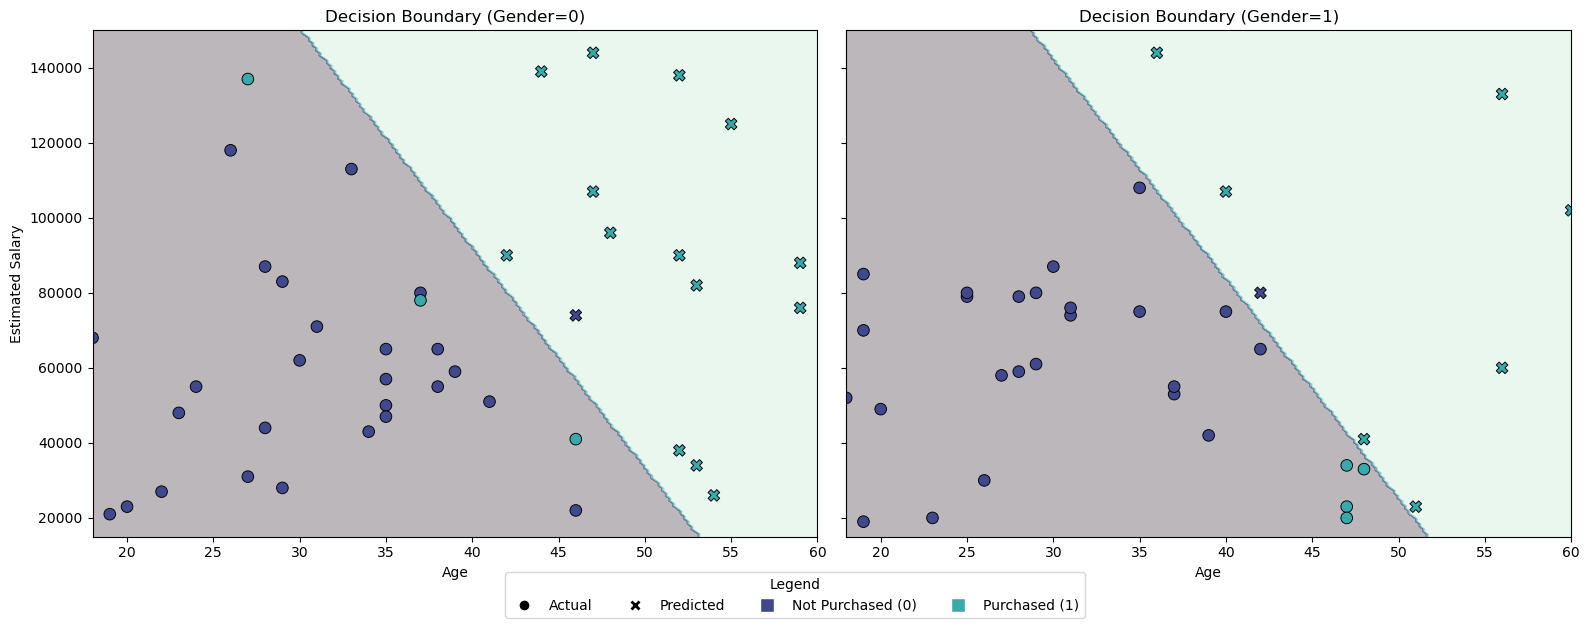

In [33]:
plot_decision_boundaries_side_by_side(model, scaler)

In [3]:
nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 3
print(nums[-k:] + nums[:-k])

[8, 9, 10, 1, 2, 3, 4, 5, 6, 7]
